In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math

In [2]:
def open_sed(filename, filetype, dimX, dimY, dimZ):
    fd = open(filename, 'rb')
    if filetype == 'raw':
        f = np.fromfile(fd, dtype=np.uint8)
    elif filetype == 'sed' or filetype == 'sumsed':
        f = np.fromfile(fd, dtype=np.float64, sep=' ')
    im = f.reshape((dimZ, dimY, dimX))   
    fd.close()
    
    print(im[:,0,0])

    slice = im[69,:,:]
    
    return slice

In [3]:
# Put in function so can open for each cycle number

file = 'F:\Visual Studio Programs\ITS-Wholebone-microCT-Bone Remodeling\guinea pig test OA resorb 2x2x2 and form1 1500\E0015896_ITS_L_1.raw'
im_slice = open_sed(file,'raw',124,166,74)

file = 'F:\Visual Studio Programs\ITS-Wholebone-microCT-Bone Remodeling\guinea pig test OA resorb 2x2x2 and form1 1500\E0015896_ITS_L_1_PR.raw'
im_PRslice = open_sed(file,'raw',124,166,74)

file_sed = 'F:\Visual Studio Programs\ITS-Wholebone-microCT-Bone Remodeling\guinea pig test OA resorb 2x2x2 and form1 1500\E0015896_ITS_L_1.sed'
im_sed = open_sed(file_sed,'sed',124,166,74)

file_sumsed = 'F:\Visual Studio Programs\ITS-Wholebone-microCT-Bone Remodeling\guinea pig test OA resorb 2x2x2 and form1 1500\E0015896_ITS_L_1.sumsed'
im_sumsed = open_sed(file_sumsed,'sumsed',124,166,74)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 127 127 127
   0   0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0]
[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.
 0.       0

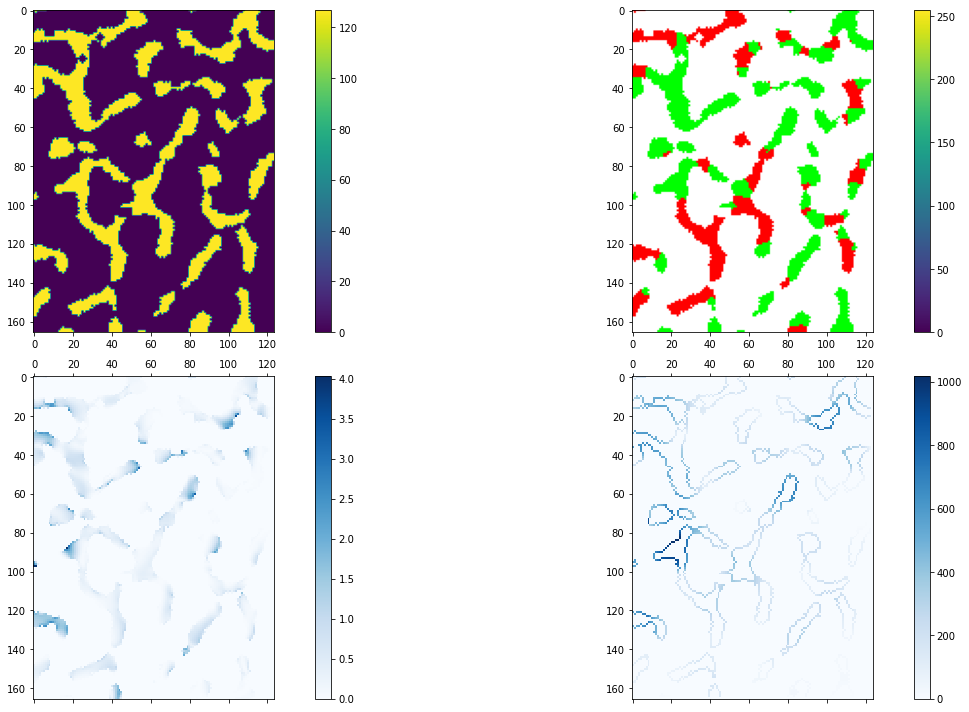

In [4]:
# To Do: Label each subplot

from matplotlib.colors import from_levels_and_colors

# plot colormap of SED value for slice above
plt.rcParams['figure.figsize'] = [20,10]
fig, ax = plt.subplots(2,2)

im0 = ax[0,0].imshow(im_slice[:,:])
fig.colorbar(im0, ax=ax[0,0])

# define color map 
color_map = {0: np.array([255, 255, 255]),     # white
             1: np.array([255, 0, 0]), # red
             2: np.array([0, 255, 0])} # green

# make a 3d numpy array that has a color channel dimension   
data_3d = np.ndarray(shape=(im_PRslice.shape[0], im_PRslice.shape[1], 3), dtype=int)

for i in range(0, im_PRslice.shape[0]):
    for j in range(0, im_PRslice.shape[1]):
        data_3d[i][j] = color_map[im_PRslice[i][j]]
        
im1 = ax[0,1].imshow(data_3d)
fig.colorbar(im1, ax=ax[0,1])

im2 = ax[1,0].matshow(im_sed[:,:], cmap=plt.cm.Blues)
fig.colorbar(im2, ax=ax[1,0])

im3 = ax[1,1].matshow(im_sumsed[:,:], cmap=plt.cm.Blues)
fig.colorbar(im3, ax=ax[1,1])

plt.tight_layout(h_pad=1)

# Write text overlaid with colormap
# for i in range(dimX):
#    for j in range(dimY):
#        c = im2d_sed[j,i]
#        ax.text(i,j,str(c),va='center',ha='center')


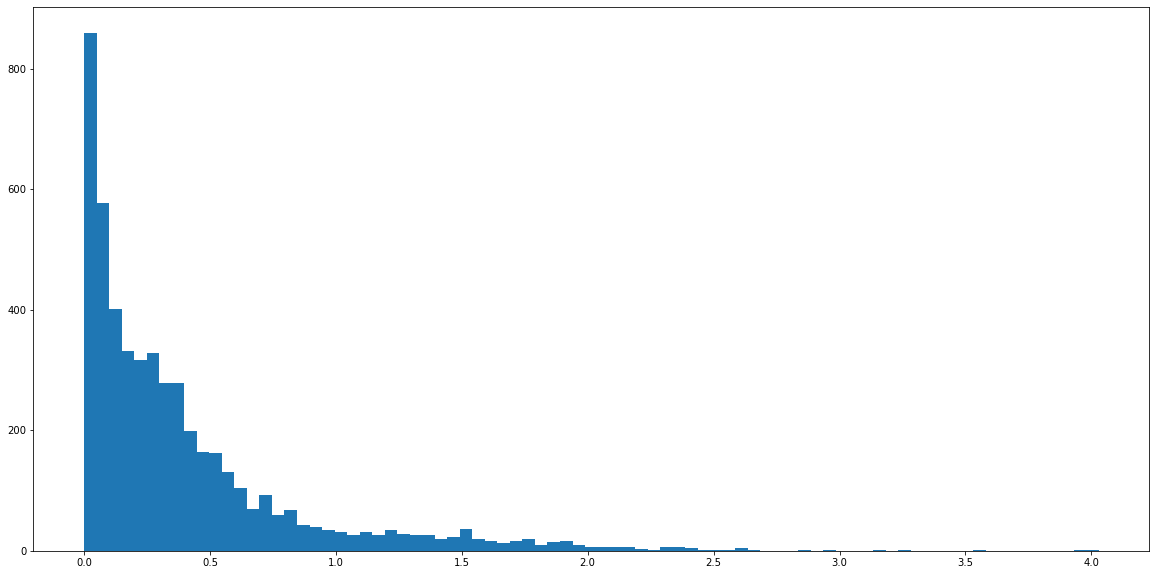

In [9]:
w = 0.05
n = math.ceil((im_sed.max() - im_sed.min())/w)
ax = plt.hist(im_sed[im_sed>0], bins = n)

(array([3.403e+03, 9.640e+02, 2.980e+02, 2.120e+02, 1.100e+02, 4.400e+01,
        1.500e+01, 4.000e+00, 2.000e+00, 3.000e+00]),
 array([1.4800000e-04, 4.0299090e-01, 8.0583380e-01, 1.2086767e+00,
        1.6115196e+00, 2.0143625e+00, 2.4172054e+00, 2.8200483e+00,
        3.2228912e+00, 3.6257341e+00, 4.0285770e+00]),
 <BarContainer object of 10 artists>)

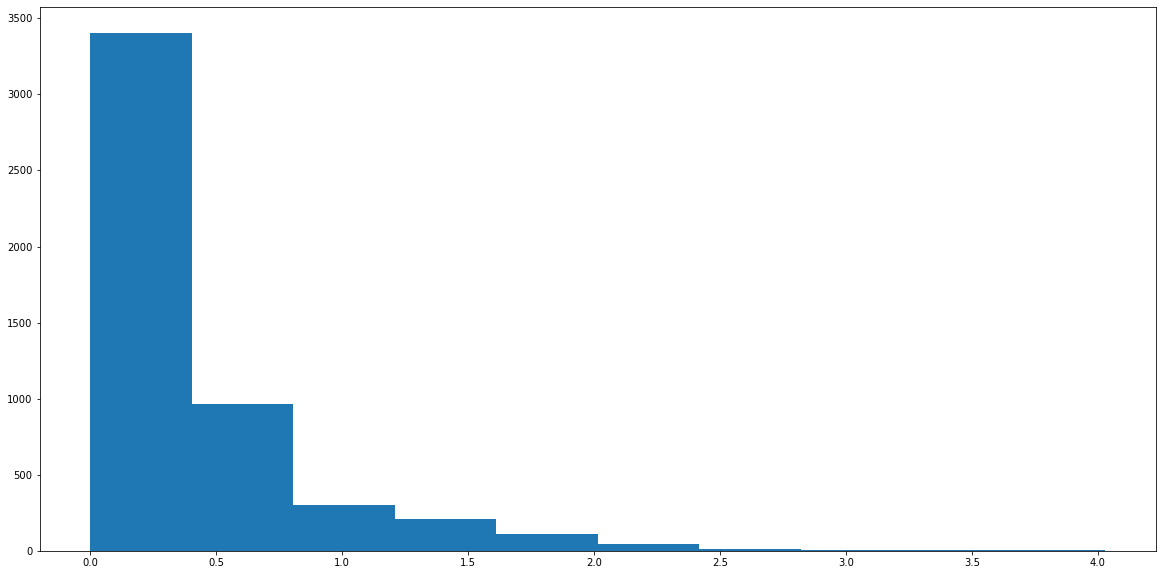

In [10]:
plt.hist(im_sed[im_sed>0])

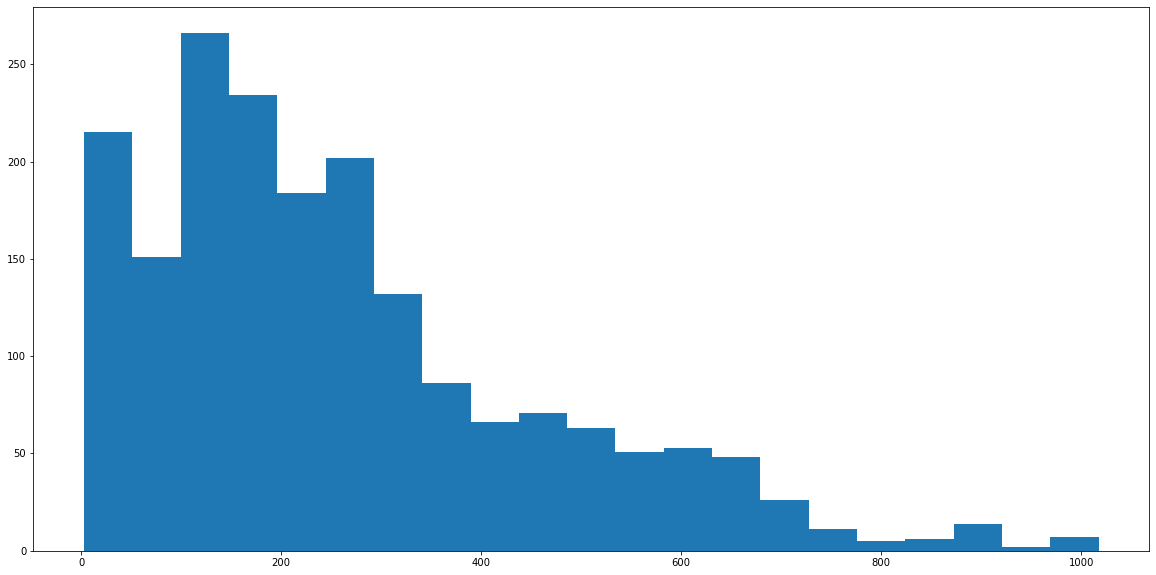

In [12]:
w = 50
n = math.ceil((im_sumsed.max() - im_sumsed.min())/w)
ax = plt.hist(im_sumsed[im_sumsed>0], bins = n)

(array([399., 503., 388., 206., 142., 115.,  89.,  21.,  20.,  10.]),
 array([   2.940742 ,  104.3747318,  205.8087216,  307.2427114,
         408.6767012,  510.110691 ,  611.5446808,  712.9786706,
         814.4126604,  915.8466502, 1017.28064  ]),
 <BarContainer object of 10 artists>)

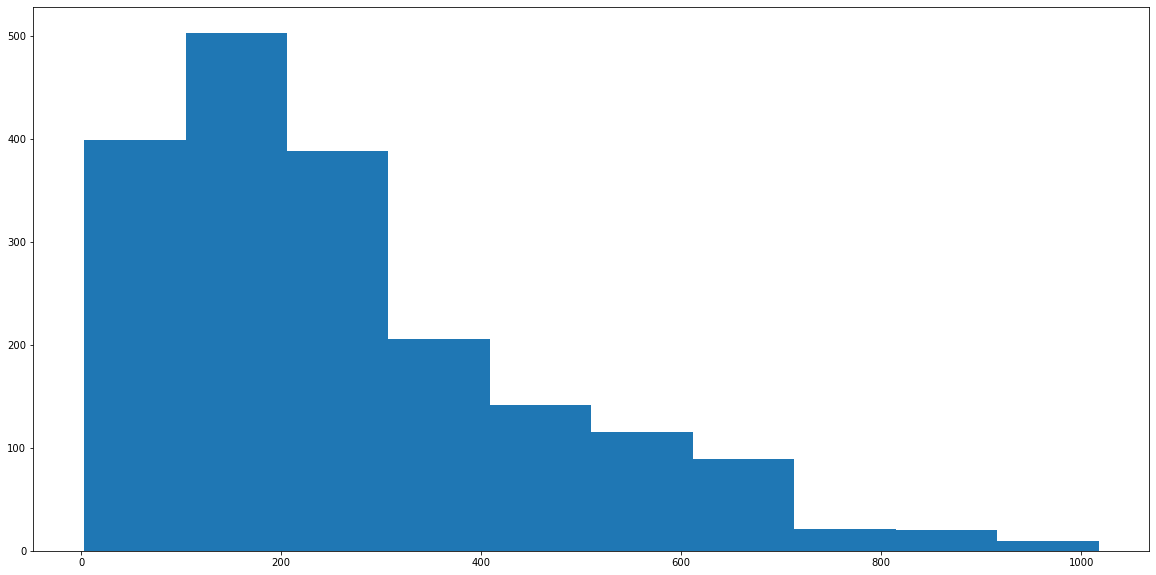

In [6]:
plt.hist(im_sumsed[im_sumsed>0])